In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Determine optimal bet

$f^*$ := fraction of the current bankroll to wager (how much to bet expressed as a fraction)

$b$ := the net fractional odds recieved on the wager, 1-to-1 odds would be $b=1$

$p$ := probability of a win

$q = 1 - q$ := probability of a loss

$f^* = p-\frac{q}{b}=\frac{bp-q}{b}=\frac{bp-(1-p)}{b}=\frac{p(b+1)-1}{b}$

In [2]:
# binomial distribution parameters
p = 0.51  # probability of a win
q = 1 - p  # probability of a loss
n_trials = 100000

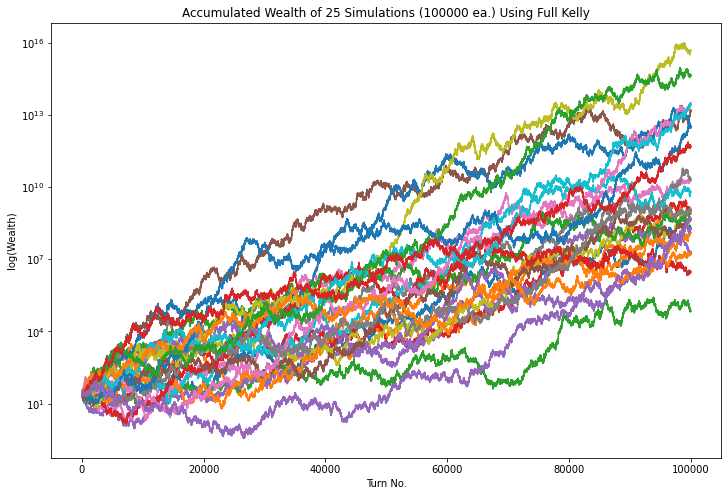

In [3]:
# simulate 25 games of `n_trials` turns
plt.figure(figsize=(12,8))
for i in range(25):
    # Kelly params
    wealth = 25
    b = 1 
    f = p - q / b
    trials = np.random.binomial(1, p, n_trials)
    record_wealth = []
    for i in trials:
        wager_amount = wealth * f
        if i==1:  # you win 🙂
            wealth = wealth + wager_amount
        else:  # you lose 🙁
            wealth = wealth - wager_amount
        record_wealth.append(wealth)
    plt.plot(record_wealth)
plt.title(f'Accumulated Wealth of 25 Simulations ({n_trials} ea.) Using Full Kelly')
plt.ylabel('log(Wealth)')
plt.xlabel('Turn No.')
plt.yscale('log')
plt.show()